**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Classification of Music into Genres with Deep Learning* 

## Abstract

This data analysis project hopes to arrive at a suitable machine learning workflow which utilizes all the tools we learned throughout the course and insights gained in the journey obtaining better results. The data is a large set of feature vectors of different songs which represents a summary of the 3 main components of music: timbre, pitch (melody and harmony) and rhythm. The task is to arrive at an optimal algorithm which classifies any input song (represented by its feature vector) into 10 genres. A principal component analysis was initially performed to extract a feature subspace from the original data. TensorFlow was used for the creation and training of the neural network. This report also focuses on the ways in which the input data can be analyzed and preprocessed for better results.

## 1. Introduction

During this machine learning course, we learned the basics of machine learning(ML). We used many different algorithms and processes commonly used in machine learning. This final project gave us the opportunity to solve a ML problem on our own, try out what we learned and use our own approach to ML. 

We decided to use this project for our own approach to ML. Machine learning has a lot of different approaches and topics on how to solve a problem. One of the more discussed ones are ’Deep Learning’ and ‘Neural Networks’. These are also quite the buzzwords at the moment. We found this project the perfect opportunity to look into deep learning and learn something new. Deep learning was always a bit of an ‘enigma’ to us, something that only crazy scientists use. The more we were motivated to use it for this classification problem. It was a jump into the void since both of use knew minimal about deep learning.  
Luckily for us during the machine learning course, there was one lecture that discussed learning and neural network briefly which gave us a good starting point. 

Listening to music is quite popular and specifying the music genre of a song is normal. But how is a music automatically classified? A song on a computer is in digitalized form. A relationship between the bits describing the music and the music genre needs to found. Without machine learning, this was done mathematically, which needs specifics value to describe the music genres. With a lot of classification problems, it is difficult to specify these values since it is not black and white. It depends a lot on peoples taste and perception of music. What we want to achieve in machine learning is to write an algorithm that emulates human thinking and decision making. For that, we need labeled data on which we can model our algorithm on or as we said ‘train our model’ on. Deep learning is trying to do as closely as possible because the theory is modeled after the human brain.


## 2. Data Analysis

For this classification problem, we were given two sets of data. One set that contains training features and the corresponding features
The features vector set is quite long with 264 items and we have a lot of features. Since the features are all values that describe the digitize music somehow there will be naturally a lot of features that are not important or redundant. 
Is it important to skim the data for getting an overview of the feature data. The smaller the feature vector the faster the program will run. Smaller feature vector doesn’t mean a better classification. 
In our case we have enough computing power, therefore, we are not dependent on a small features vector set. In real life when computing power is not always readily available, reducing the feature vector is crucial, sometimes on the chance of increased accuracy.  
We sliced the feature vectors in the different statistics and try to get an overview of the data with histograms.
What we are looking for is the features that vary the most. A big variance makes it easier to find a pattern between features and labels. For example, the features of the kurtosis of the rhythm vary almost nothing. This is a very unfortunate data set to train the model on. Since this data will no help us to find the classification, we will remove these data points from the training set. The same can be said for the variance and minimum and maximum of the chroma data. A very good training set would be the standard deviation of the chroma or the mean of MFCC. Both change very much over the different feature vectors.  
The maximum variance among the feature vectors can be obtained by hand like described above or it can be achieved by library function that compressed the feature vectors. 

Normalizing the data is very important to reduce distortion. Since all the data for the feature is from the same measurement it should be the same range. In the given data this is not the case. Therefore, we normalized the data so that all features are weighted equally.

To get a feeling for the result we plotted the classification in a histogram. It shows nicely how the song are spread over the different music genres. We could assume to have a similar distribution for the predicted values. It will be interesting to see if there is a correlation between the distribution of the training data and the distribution of the results.



In [1]:
##Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Ensuring reproducible results
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

#Deep learning library Tensorflow
import tensorflow as tf
from tensorflow import keras

#Machine learning library Sciki-Learn
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm


In [2]:
##Load the data 
#Training data 4363 songs, 264 features per song
org_train_data = pd.read_csv("Data/train_data.csv")
org_train_data = org_train_data.as_matrix();

#Training labels 4363 songs, 1 label per song, 10classes(1-10)
org_train_labels = pd.read_csv("Data/train_labels.csv") 
org_train_labels = org_train_labels.as_matrix()

#Test data without labels 6544 songs
val_data = pd.read_csv("Data/test_data.csv",header = None)
val_data = val_data.as_matrix()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [3]:
##Analyzing unprocessed training data
#slice training data into the different features

#Rhythm features
rhythm=org_train_data[:,0:168]
rmean=rhythm[:,0:24]
rmedian=rhythm[:,24:48]
rvariance=rhythm[:,48:72]
rkurtosis=rhythm[:,72:96]
rskewness=rhythm[:,96:120]
rmin=rhythm[:,120:144]
rmax=rhythm[:,144:168]

#Chroma features
chroma=org_train_data[:,168:216]
cmean=chroma[:,0:12]
cstandev=chroma[:,12:24]
cmax=chroma[:,24:36]
cmin=chroma[:,36:48]

#MFCC features
mfcc=org_train_data[:,216:264]
mmean=mfcc[:,0:12]
mstandev=mfcc[:,12:24]
mmax=mfcc[:,24:36]
mmin=mfcc[:,36:48]

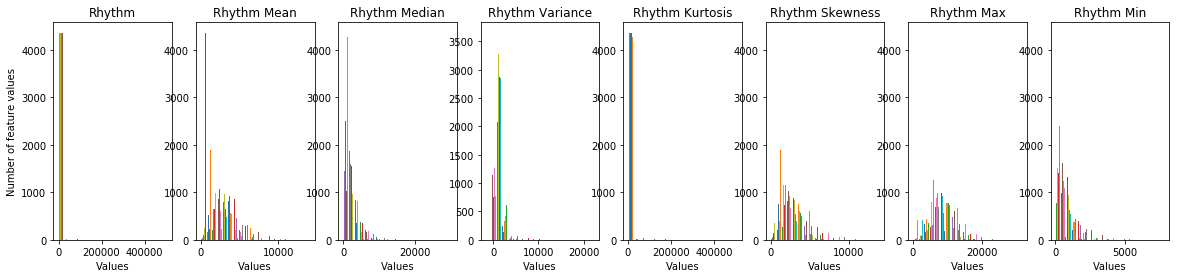

In [4]:
##Data visualizing
#Histograms for Rhythm
n_bins = 20;
fig = plt.figure(figsize=(20,4))
plt.subplot(1, 8, 1)
plt.hist(rhythm, bins=n_bins)
plt.title('Rhythm')
plt.xlabel('Values')
plt.ylabel('Number of feature values')
plt.subplot(1, 8, 2)
plt.hist(rmean, bins=n_bins)
plt.title('Rhythm Mean')
plt.xlabel('Values')
plt.subplot(1, 8, 3)
plt.hist(rmedian, bins=n_bins)
plt.title('Rhythm Median')
plt.xlabel('Values')
plt.subplot(1, 8, 4)
plt.hist(rvariance, bins=n_bins)
plt.title('Rhythm Variance')
plt.xlabel('Values')
plt.subplot(1, 8, 5)
plt.hist(rkurtosis, bins=n_bins)
plt.title('Rhythm Kurtosis')
plt.xlabel('Values')
plt.subplot(1, 8, 6)
plt.hist(rskewness, bins=n_bins)
plt.title('Rhythm Skewness')
plt.xlabel('Values')
plt.subplot(1, 8, 7)
plt.hist(rmax, bins=n_bins)
plt.title('Rhythm Max')
plt.xlabel('Values')
plt.subplot(1, 8, 8)
plt.hist(rmin, bins=n_bins)
plt.title('Rhythm Min')
plt.xlabel('Values')
plt.show()

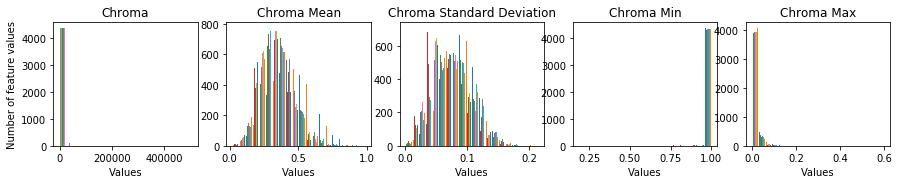

In [5]:
#Histograms for Chroma
n_bins = 20;
fig = plt.figure(figsize=(15,5))
plt.subplot(2, 5, 1)
plt.hist(rhythm, bins=n_bins)
plt.title('Chroma')
plt.xlabel('Values')
plt.ylabel('Number of feature values')
plt.subplot(2, 5, 2)
plt.hist(cmean, bins=n_bins)
plt.title('Chroma Mean')
plt.xlabel('Values')
plt.subplot(2, 5, 3)
plt.hist(cstandev, bins=n_bins)
plt.title('Chroma Standard Deviation')
plt.xlabel('Values')
plt.subplot(2, 5, 4)
plt.hist(cmin, bins=n_bins)
plt.title('Chroma Min')
plt.xlabel('Values')
plt.subplot(2, 5, 5)
plt.hist(cmax, bins=n_bins)
plt.title('Chroma Max')
plt.xlabel('Values')
plt.show()

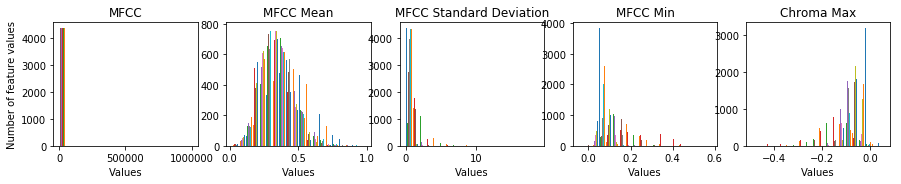

In [6]:
#Histograms for MFCC
n_bins = 20;
fig = plt.figure(figsize=(15,5))
plt.subplot(2, 5, 1)
plt.hist(mfcc, bins=n_bins)
plt.title('MFCC')
plt.xlabel('Values')
plt.ylabel('Number of feature values')
plt.subplot(2, 5, 2)
plt.hist(cmean, bins=n_bins)
plt.title('MFCC Mean')
plt.xlabel('Values')
plt.subplot(2, 5, 3)
plt.hist(mstandev, bins=n_bins)
plt.title('MFCC Standard Deviation')
plt.xlabel('Values')
plt.subplot(2, 5, 4)
plt.hist(mmin, bins=n_bins)
plt.title('MFCC Min')
plt.xlabel('Values')
plt.subplot(2, 5, 5)
plt.hist(mmax, bins=n_bins)
plt.title('Chroma Max')
plt.xlabel('Values')
plt.show()

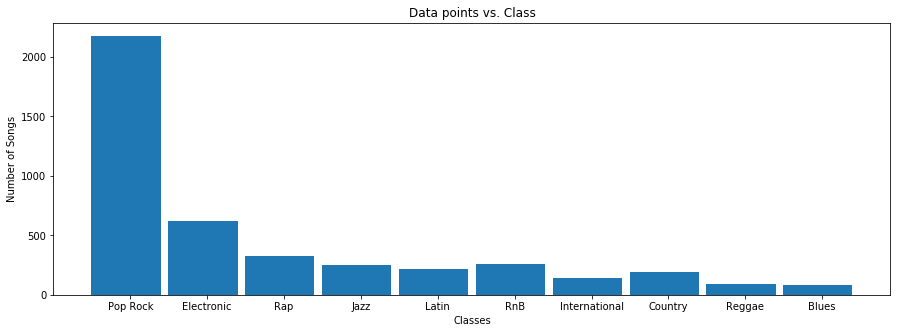

In [7]:
#Histogram of the classes
bins = 10
fig = plt.figure(figsize=(15,5))
plt.title("Data points vs. Class")
plt.xlabel("Classes")
plt.ylabel("Number of Songs")
class_names=[ 'Pop Rock', 'Electronic','Rap', 'Jazz','Latin', 'RnB','International', 'Country','Reggae', 'Blues']
plt.xticks(np.linspace(1.5,10.5,11),class_names)
plt.hist(org_train_labels,bins,rwidth=0.9, )
plt.show()

In [8]:
##Removing unwanted features
train_data = np.hstack((org_train_data[:,0:88],org_train_data[:,92:264]))
val_data = np.hstack((val_data[:,0:88],val_data[:,92:264])) 

In [9]:
##Splitting Data for Training and Validation
ratio = 0.2
train_data, test_data, train_lbl, test_lbl = train_test_split(
    train_data, org_train_labels, test_size=ratio, random_state=0)
print(train_data.shape)
print(test_data.shape)

(3489, 260)
(873, 260)


In [10]:
#Standardizing data with Scikit's standardizing library
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)
# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
val_data = scaler.transform(val_data) 

## 3. Methods and Experiments

From analysis of the training set feature vectors, we could see that there is a lot of feature values which might not be that relevant and do not contribute to the overall varaince of each training sample. 
We wanted to perform some sort of feature learning so that we can compress the feature vector to something more workable. This inturn can be fed to a neural network.

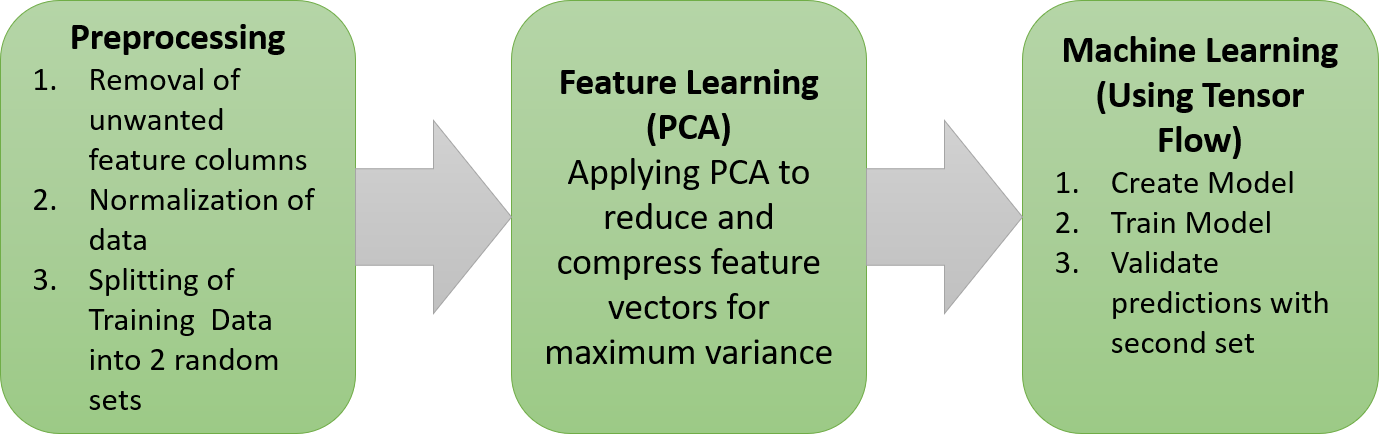

The structure of the program is seen in the following picture. In the chapter 'Data analysis' the preprocessing is done. This includes the data cleanup, validation, and processing. In the second step the features are processed again, but here it is done automatically. The goal is to compress the feature matrix as much as possible to ensure the deep learning network will converge as fast as possible. In the third part, the actual machine learning takes place. We create our deep learning model and train it with the training dataset. The next step in the third part is to calculate the predictions for the test data set. In the final step, we validate the predictions and calculate the accuracy and the loss of the predictions. 

Scikit provides a comprehensive library to perform PCA effortlessly, thus it was chosen for performing Principal component analysis. Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. It is quite important to standardize the data first in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance. Noramalization is unnecessary as this will fail to center the variables.

Applying deep learning was the next step using Tensorflow's inbuilt high-level keras API.
The following measures were taken to optimize the neural network
1. Epoch was choosen as 10 which is quite low as our training data set is quite small (~4000). Higher epochs could result in overfitting and perform worse on validation data and thus in general.
2. The Input layer had same number of neurons as dimensionality of feature vector. 
3. The Output layer has 10 nodes(= number of class labels)
4. The hidden layer in between has 56 nodes as we chose a number that is mean of the input and output layer.
5. We also included a dropout layer to discourage overfitting
6. All layers except the output layer had RELU activation function as it has recently proven to be more effective. 
   Since this is a multi-class classification problem, we used softmax for the output layer.
6. Adam Optimizer was choosen as empirical results demonstrate that Adam works well in practice and compares favorably to other    stochastic optimization methods.



In [11]:
##Apply PCA to reduce featureset for max variance
pca = PCA(.95)
pca.fit(train_data)
pca.n_components_

train_data = pca.transform(train_data)
test_data = pca.transform(test_data)
val_data = pca.transform(val_data)

print("Shape after PCA = ",train_data.shape, test_data.shape,val_data.shape)

Shape after PCA =  (3489, 102) (873, 102) (6544, 102)


In [12]:
##Shifting train and test label data as labels start at 1 (Using softmax activation function)
train_lbl = train_lbl - 1;
test_lbl = test_lbl - 1;

In [13]:
##Trials with ML algorithms
#Tensorflow
#Initializing layers
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=train_data[1].shape))
model.add(keras.layers.Dense(56, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

##Using different 
optimizer=tf.train.AdamOptimizer()
model.compile(optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
epochs = 10
temp = model.fit(train_data, train_lbl, epochs = epochs)
[loss, acc] = model.evaluate(test_data, test_lbl)
print("Accuracy of Test ",epochs," epoch = ",acc)
print("Loss of Test ",epochs," epoch = ",loss)
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 102)               0         
_________________________________________________________________
dense (Dense)                (None, 56)                5768      
_________________________________________________________________
dropout (Dropout)            (None, 56)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                570       
Total params: 6,338
Trainable params: 6,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3489/3489 [==============================] - 0s 86us/step - loss: 2.5677 - acc: 0.2723
Epoch 2/10
3489/3489 [==============================] - 0s 31us/step - loss: 1.6681 - acc: 0.5087
Epoch 3/10
3489/3489 [==============================] - 0s 31us/step - loss:

In [14]:
#Predicting labels of Test Data using model
predictions = model.predict(val_data)
print(predictions.shape)

(6544, 10)


### Using predictions to create predicted labels

In [15]:
##Creating Class list
class_list = np.zeros(predictions.shape[0])
for i in range(predictions.shape[0]):
    class_list[i] = int(np.argmax(predictions[i]) + 1)
print(class_list.shape)
print(class_list[2])

(6544,)
1.0


### Creating Class list

In [16]:

class_list = np.zeros(predictions.shape[0])
for i in range(predictions.shape[0]):
    class_list[i] = int(np.argmax(predictions[i]) + 1)
print(class_list.shape)


(6544,)


### Creating CSVs for Kaggle

In [17]:
##Creating CSVs for Kaggle
##For Predictions
df = pd.DataFrame(predictions)
df.index = np.arange(1,len(df)+1)
df.index.name = "Sample_id"
print(df.shape)
df.to_csv("probabilities.csv",header=["Class_1","Class_2","Class_3","Class_4","Class_5","Class_6","Class_7","Class_8","Class_9","Class_10"],line_terminator='\n')

##For Class List
df2 = pd.DataFrame(class_list)
df2.index = np.arange(1,len(df)+1)
df2.index.name = "Sample_id"
df2.to_csv("accuracy.csv",header=["Sample_label"],line_terminator='\n')


(6544, 10)


## 4. Results

We were able to achieve a top accuracy of 0.65002 and log-loss of 0.17633 in kaggle competition. 

During training, the model achieved top accuracy of of 0.73 though this metric is irrelevant. The performance of the model was actually validated using the random partition created from original training data. 
Evaluation yielded a top accuracy of 0.69 and log-loss of 1.06

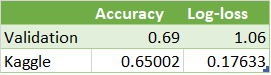

As we can see it performs a bit worse on Kaggle compared to our validation data. This is due to the fact that our training data set is limited and Kaggle test data has more diverse data. 

### Confusion Matrix 

Predicted  1.0  2.0  3.0  4.0  5.0  6.0  8.0  9.0  All
Actual                                                
1          416   20    5    6    0    3    5    0  455
2           33   79    3    3    0    1    0    1  120
3            3    5   48    0    0    2    0    0   58
4           16    2    0   24    0    0    0    0   42
5           29    2    4    0    1    4    1    0   41
6           27    5    8    5    0    9    2    0   56
7           19    3    3    3    1    0    0    0   29
8           26    0    1    1    0    0    7    0   35
9            7    2    9    0    0    1    0    1   20
10          13    0    2    1    0    1    0    0   17
All        589  118   83   43    2   21   15    2  873


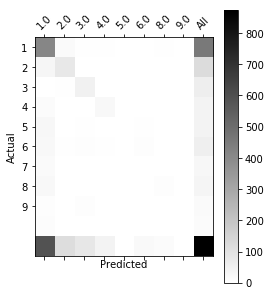

In [18]:
##Predictions for Test Data for confusion matrix
predictions_testdata = model.predict(test_data)
##For test_data
class_list_test = np.zeros(predictions_testdata.shape[0])
for i in range(predictions_testdata.shape[0]):
    class_list_test[i] = int(np.argmax(predictions_testdata[i]) + 1)
##Shifting labels by 1
shif_test_lbl = test_lbl + 1;

#Confusion matrix ...
df_confusion = pd.crosstab(shif_test_lbl[:,0], class_list_test, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

## 5. Discussion/Conclusions

The result for accuracy and the logistic loss are above the required benchmark which makes this project a success. Since our results are in the higher range of results it shows that our model is competitive. 

As discussed in the chapter ‘Data Analysis” the class ‘Pop Rock’ has the most song from the training dataset. In the confusion matrix, which displays the probabilities of each class, it clearly shows the same effect. Therefore, we can say our model and results are plausible. Since the numbers for accuracy and loss are above the benchmark, we can say our algorithm is a good fit for solving this problem. 

Future research could look into different deep learning libraries like Caffe, Neon or Torch. 
Additionally, the current model built with the Tensorflow library could be refined and improved since Tensorflow is quite powerful and has a lot of different approaches to offer. For example, the layers of the neural network can be expanded, different layers used or custom regression functions built. 

We see a chance for improvement in the different combination of features. The features in this program were mainly automatically compressed. But as seen in the histograms there are a lot of features that are not so helpful and meaningful to this problem. We think there is potential for improvement with manual compression and removal of unnecessary features.  Further research into that direction could improve the results and the speed of execution. 

To protect the model from possible overfitting there is a technique called cross-validation. We didn’t use cross-validation directly, but we split the training data into different sets to avoid overfitting. This split may or may not be favorable for the fit. To avoid the bias of the results because of the split we could implement cross-validation. Cross-validation would make sure to remove the splitting bias by introducing random splitting and evaluation of the estimated error. 

This project definitely answered some of our questions. It was fun to learn something completely new and work independently on such a project. We had the chance to learn about and build our own deep learning algorithm. It also answered how music is automatically classified into music genre. To be able to do that ourselves (at least partially) is very empowering. Though the obstacles along the road of developing this algorithm humbled us and showed us where the challenges in such problems are. On one hand, it is surprising how fast we came up with a program that gave results above the benchmark. But on the other hand, it was incredibly difficult to improve the accuracy and the loss after that. That shows that it might be easy to get an algorithm but very challenging to develop a good algorithm.

## 6. References

All information to produce this program was taken from:

Tensorflow: https: www.tensorflow.org 
https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
        
Scikit-learn:http://scikit-learn.org/stable/index.html 

Principal Component Analysis: http://setosa.io/ev/principal-component-analysis/  
https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb

Selection of Activation functions:
https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks

Choice of Optimizer: 
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

